# University Rankings

Ranking universities is a difficult, political, and controversial practice. There are hundreds of different national and international university ranking systems, many of which disagree with each other.

Here we compare and infer from this dataset which contains two global university rankings from very different places. Namely:

- The Times Higher Education World University Ranking 
- The Center for World University Rankings

We will be mainly looking at the the Time Rankings and we will see how it differs from the lesser known CWU Rankings.

This dataset was obtained from: https://www.kaggle.com/mylesoneill/world-university-rankings

The course [Data Analysis with Python: Zero to Pandas](zerotopandas.com), helped me perform this data analysis.

### Downloading the Dataset

We download the dataset from Kaggle and it must be in a CSV format. We will use opendatasets to download it.

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
dataset_url = 'https://www.kaggle.com/mylesoneill/world-university-rankings' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nehamalcomfrancis
Your Kaggle Key: ········


100%|██████████| 1.41M/1.41M [00:00<00:00, 55.3MB/s]

The dataset has been downloaded and extracted.

In [4]:
data_dir = './world-university-rankings'

Let us save and upload our work to Jovian before continuing.

In [5]:
project_name = "zerotopandas-course-project-world-university-rankings"

In [6]:
!pip install jovian --upgrade -q

In [7]:
import jovian

In [8]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "nehamalcom/zerotopandas-course-project-world-university-rankings" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/nehamalcom/zerotopandas-course-project-world-university-rankings


'https://jovian.ai/nehamalcom/zerotopandas-course-project-world-university-rankings'

## Data Preparation and Cleaning

We will use Pandas to load the dataset into a data frame and try and understand and refine this data



In [9]:
import pandas as pd
times_ranking_raw_df = pd.read_csv('./world-university-rankings/timesData.csv',index_col='world_rank')
cwur_ranking_raw_df = pd.read_csv('./world-university-rankings/cwurData.csv',index_col='world_rank')



In [10]:
times_ranking_raw_df

,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
world_rank,,,,,,,,,,,,,
1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...
601-800,Yeungnam University,South Korea,18.6,24.3,10.9,26.5,35.4,-,"21,958",15.3,3%,48 : 52,2016
601-800,Yıldız Technical University,Turkey,14.5,14.9,7.6,19.3,44.0,-,"31,268",28.7,2%,36 : 64,2016
601-800,Yokohama City University,Japan,24.0,16.1,10.2,36.4,37.9,-,"4,122",3.7,3%,NaN,2016


In [11]:
times_ranking_raw_df.columns

Index(['university_name', 'country', 'teaching', 'international', 'research',
       'citations', 'income', 'total_score', 'num_students',
       'student_staff_ratio', 'international_students', 'female_male_ratio',
       'year'],
      dtype='object')

In [12]:
cwur_ranking_raw_df

,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
world_rank,,,,,,,,,,,,,
1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015
997,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015
998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015


In [13]:
cwur_ranking_raw_df.rename(columns={"institution": "university_name"},inplace=True)
cwur_ranking_raw_df.rename(columns={"score": "total_score"},inplace=True)

In [14]:
#selecting only the common and required columns
selected_columns = [
    'university_name', 
    'country', 
    'teaching', 
    'research',
    'citations', 
    'total_score', 
    'year']

In [15]:
times_ranking_df = times_ranking_raw_df[selected_columns].copy()

In [16]:
times_ranking_df

,university_name,country,teaching,research,citations,total_score,year
world_rank,,,,,,,
1,Harvard University,United States of America,99.7,98.7,98.8,96.1,2011
2,California Institute of Technology,United States of America,97.7,98.0,99.9,96.0,2011
3,Massachusetts Institute of Technology,United States of America,97.8,91.4,99.9,95.6,2011
4,Stanford University,United States of America,98.3,98.1,99.2,94.3,2011
5,Princeton University,United States of America,90.9,95.4,99.9,94.2,2011
...,...,...,...,...,...,...,...
601-800,Yeungnam University,South Korea,18.6,10.9,26.5,-,2016
601-800,Yıldız Technical University,Turkey,14.5,7.6,19.3,-,2016
601-800,Yokohama City University,Japan,24.0,10.2,36.4,-,2016


In [17]:
times_ranking_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2603 entries, 1 to 601-800
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   university_name  2603 non-null   object 
 1   country          2603 non-null   object 
 2   teaching         2603 non-null   float64
 3   research         2603 non-null   float64
 4   citations        2603 non-null   float64
 5   total_score      2603 non-null   object 
 6   year             2603 non-null   int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 162.7+ KB


In [18]:
#times the total_score was not numeric so let us change that
times_ranking_df['total_score']=pd.to_numeric(times_ranking_df['total_score'], errors='coerce')

In [19]:
times_ranking_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2603 entries, 1 to 601-800
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   university_name  2603 non-null   object 
 1   country          2603 non-null   object 
 2   teaching         2603 non-null   float64
 3   research         2603 non-null   float64
 4   citations        2603 non-null   float64
 5   total_score      1201 non-null   float64
 6   year             2603 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 162.7+ KB


In [20]:
selected_columns = [
    'university_name', 
    'country',  
    'total_score', 
    'year']
cwur_ranking_df = cwur_ranking_raw_df[selected_columns].copy()

In [21]:
#let us only look at the universities with valid total_scores above 50
times_ranking_df.drop(times_ranking_df[times_ranking_df.total_score<50].index,inplace=True)
times_ranking_df.dropna(inplace=True)
cwur_ranking_df.drop(cwur_ranking_df[cwur_ranking_df.total_score<50].index,inplace=True)
cwur_ranking_df.dropna(inplace=True)

In [22]:
times_ranking_df

,university_name,country,teaching,research,citations,total_score,year
world_rank,,,,,,,
1,Harvard University,United States of America,99.7,98.7,98.8,96.1,2011
2,California Institute of Technology,United States of America,97.7,98.0,99.9,96.0,2011
3,Massachusetts Institute of Technology,United States of America,97.8,91.4,99.9,95.6,2011
4,Stanford University,United States of America,98.3,98.1,99.2,94.3,2011
5,Princeton University,United States of America,90.9,95.4,99.9,94.2,2011
...,...,...,...,...,...,...,...
=180,University of Gothenburg,Sweden,28.5,39.8,81.8,50.2,2016
=180,Scuola Superiore Sant’Anna,Italy,42.5,23.2,84.5,50.2,2016
=182,University of Bergen,Norway,32.5,31.5,82.4,50.1,2016


In [23]:
cwur_ranking_df

,university_name,country,total_score,year
world_rank,,,,
1,Harvard University,USA,100.00,2012
2,Massachusetts Institute of Technology,USA,91.67,2012
3,Stanford University,USA,89.50,2012
4,University of Cambridge,United Kingdom,86.17,2012
5,California Institute of Technology,USA,85.21,2012
...,...,...,...,...
107,University of Alberta,Canada,50.25,2015
108,Leiden University,Netherlands,50.17,2015
109,Tokyo Institute of Technology,Japan,50.13,2015


In [24]:
import jovian

In [25]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "nehamalcom/zerotopandas-course-project-world-university-rankings" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/nehamalcom/zerotopandas-course-project-world-university-rankings


'https://jovian.ai/nehamalcom/zerotopandas-course-project-world-university-rankings'

## Exploratory Analysis and Visualization

Let us visualize our data.


Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [26]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [27]:
top10countries = times_ranking_df.country.value_counts().head(10)
top10countries

United States of America    336
United Kingdom              114
Netherlands                  45
Germany                      45
Australia                    36
Canada                       34
Switzerland                  33
Sweden                       25
France                       21
Japan                        20
Name: country, dtype: int64

#### Number of top universities in different countries (Times)

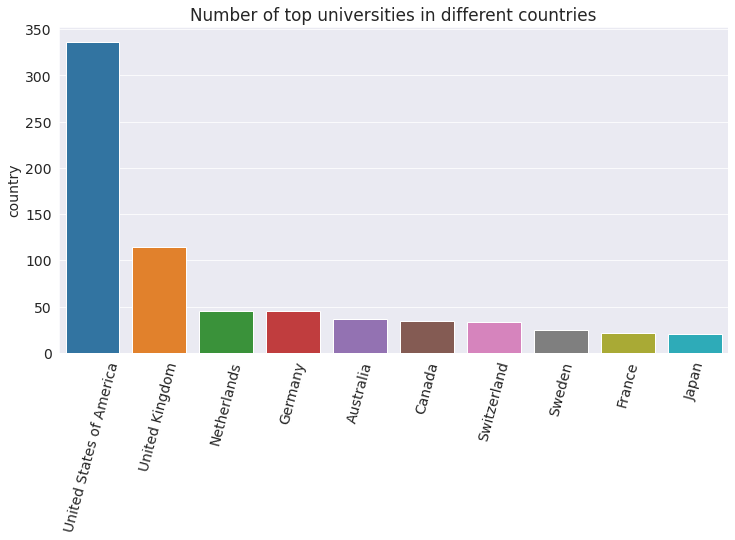

In [28]:
plt.figure(figsize=(12,6))
plt.title("Number of top universities in different countries")
plt.xticks(rotation=75)
sns.barplot(x=top10countries.index,y=top10countries);

#### Top 10 ranks' contribution to research (Times)

In [29]:
research_contribution = times_ranking_df.head(10)['research']/times_ranking_df.head(10)['research'].sum()
research_contribution

world_rank
1     0.103557
2     0.102822
3     0.095898
4     0.102927
5     0.100094
6     0.098730
6     0.098521
8     0.104186
9     0.099150
10    0.094114
Name: research, dtype: float64

<ipython-input-30-76d46d2ff358>:3: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(research_contribution, labels=research_contribution.index, autopct='%1.1f%%', startangle=180);


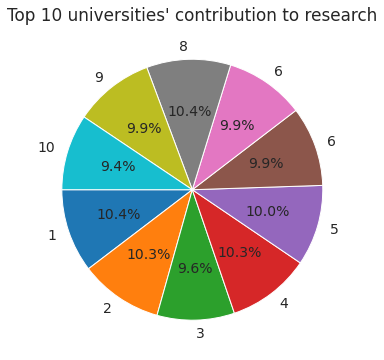

In [30]:
plt.figure(figsize=(12,6))
plt.title("Top 10 universities' contribution to research")
plt.pie(research_contribution, labels=research_contribution.index, autopct='%1.1f%%', startangle=180);

#### Total scores of top 50 universities (Times)

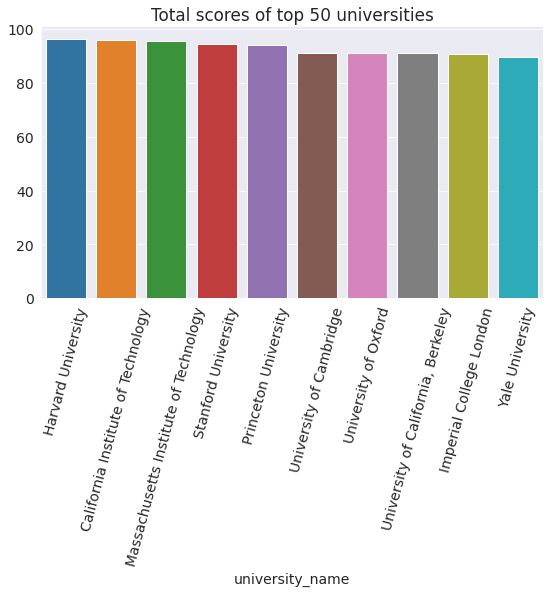

In [31]:
sns.barplot(y=times_ranking_df.head(10).total_score,x=times_ranking_df.head(10).university_name)
plt.xticks(rotation=75);
plt.title("Total scores of top 50 universities")
plt.ylabel(None);

#### Number of top universities in different countries (CWU)

In [32]:
top10countries = cwur_ranking_df.country.value_counts().head(10)
top10countries

USA               140
United Kingdom     17
Japan              17
Canada             10
Israel              9
France              8
South Korea         4
Switzerland         4
Netherlands         3
Finland             2
Name: country, dtype: int64

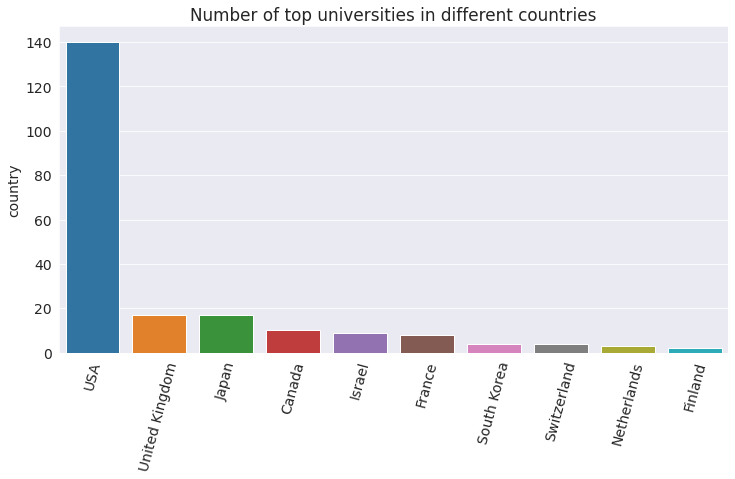

In [33]:
plt.figure(figsize=(12,6))
plt.title("Number of top universities in different countries")
plt.xticks(rotation=75)
sns.barplot(x=top10countries.index,y=top10countries);

Comparing the country distribution with that of Times, one can see that CWUR has covered more of the Scandinavian and Asian countries than Times. Times shows more countries that have good expatriate pollicies and student policies so this could be a reason why Times is more popular.

Let us save and upload our work to Jovian before continuing

In [34]:
import jovian

In [35]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "nehamalcom/zerotopandas-course-project-world-university-rankings" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/nehamalcom/zerotopandas-course-project-world-university-rankings


'https://jovian.ai/nehamalcom/zerotopandas-course-project-world-university-rankings'

## Asking and Answering Questions

Let's attempt to answer more questions about this dataset



#### Q1: How does Times and CWU differ in the top 3 universities?

In [36]:
times3top = times_ranking_df.head(3)
times3top

,university_name,country,teaching,research,citations,total_score,year
world_rank,,,,,,,
1,Harvard University,United States of America,99.7,98.7,98.8,96.1,2011
2,California Institute of Technology,United States of America,97.7,98.0,99.9,96.0,2011
3,Massachusetts Institute of Technology,United States of America,97.8,91.4,99.9,95.6,2011


In [37]:
cwur3top = cwur_ranking_df.head(3)
cwur3top

,university_name,country,total_score,year
world_rank,,,,
1,Harvard University,USA,100.00,2012
2,Massachusetts Institute of Technology,USA,91.67,2012
3,Stanford University,USA,89.50,2012


In [38]:
pd.merge(cwur3top,times3top,on="university_name")

,university_name,country_x,total_score_x,year_x,country_y,teaching,research,citations,total_score_y,year_y
0,Harvard University,USA,100.00,2012,United States of America,99.7,98.7,98.8,96.1,2011
1,Massachusetts Institute of Technology,USA,91.67,2012,United States of America,97.8,91.4,99.9,95.6,2011


They share two universities in the top 3.

#### Q2: Which is the university with the most amount of research done according to Times?

In [39]:
print(times_ranking_df[times_ranking_df.research == times_ranking_df.research.max()]) 

                               university_name                   country  \
world_rank                                                                 
10          University of California, Berkeley  United States of America   
1           California Institute of Technology  United States of America   
6                         Princeton University  United States of America   

            teaching  research  citations  total_score  year  
world_rank                                                    
10              82.8      99.4       99.4         89.8  2012  
1               96.3      99.4       99.7         95.5  2013  
6               89.5      99.4       99.8         92.7  2013  


These three universities although not in the top 3 except for California Institute of Technology have contributed most to research.

#### Q3: Which country has the highest score total according to CWUR?

In [40]:
import numpy as np
countries_total_score = cwur_ranking_df.groupby('country')['total_score'].sum()
countries_total_score

country
Australia           50.40
Canada             549.30
Finland            100.80
France             440.34
Germany             50.58
Israel             539.87
Japan             1089.89
Netherlands        151.56
Norway              50.70
Russia              56.42
South Korea        233.14
Switzerland        270.79
USA               9445.93
United Kingdom    1257.96
Name: total_score, dtype: float64

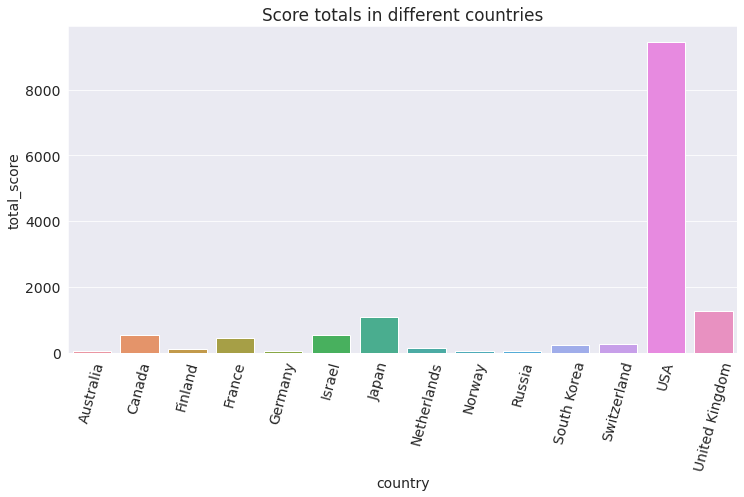

In [41]:
plt.figure(figsize=(12,6))
plt.title("Score totals in different countries")
plt.xticks(rotation=75)
sns.barplot(x=countries_total_score.index,y=countries_total_score);

As seen clearly, USA has the maximum score total; followed by the UK and Japan.

#### Q4: Compare the rank given by Times and CWU to Princeton University.

In [42]:
rank_times=times_ranking_df[times_ranking_df['university_name']=="Kyoto University"].head(1).index
rank1 = times_ranking_df[times_ranking_df['university_name']=="Kyoto University"].index
rank1 = int(rank1[0])
rank_cwur=cwur_ranking_df[cwur_ranking_df['university_name']=="Kyoto University"].head(1).index
rank2 = cwur_ranking_df[cwur_ranking_df['university_name']=="Kyoto University"].index
rank2 = int(rank2[0])


In [43]:
print("The rank given to Kyoto University by Times is {} while CWU gave them a rank of {} .".format(rank1,rank2))

The rank given to Kyoto University by Times is 57 while CWU gave them a rank of 17 .


Let us save and upload our work to Jovian before continuing.

In [44]:
import jovian

In [45]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "nehamalcom/zerotopandas-course-project-world-university-rankings" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/nehamalcom/zerotopandas-course-project-world-university-rankings


'https://jovian.ai/nehamalcom/zerotopandas-course-project-world-university-rankings'

## Inferences and Conclusion

Let us try and analyse why Times is the more popular university ranking. On comparing the country distribution with that of Times, one can see that CWUR has covered more of the Scandinavian and Asian countries than Times. Times shows more countries that have good expatriate pollicies and student policies so this could be a reason why Times is more popular.

In [46]:
import jovian

In [47]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "nehamalcom/zerotopandas-course-project-world-university-rankings" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/nehamalcom/zerotopandas-course-project-world-university-rankings


'https://jovian.ai/nehamalcom/zerotopandas-course-project-world-university-rankings'

## References and Future Work

Apart from the many questions I referred from https://stackoverflow.com, I also found the following sites helpful:
- https://www.practicaldatascience.org
- https://datatofish.com

In [48]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
